In [1]:
import tensorflow as tf


In [2]:
tf.__version__

'2.19.0'

In [3]:
from tensorflow.keras.datasets.mnist import load_data

In [4]:
from tensorflow.keras import Sequential

In [5]:
from tensorflow.keras.layers import Dense

In [6]:
(X_train,y_train),(X_test,y_test) = load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [7]:
X_train.shape , X_test.shape , y_train.shape , y_test.shape

((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

In [8]:
set(y_train)

{np.uint8(0),
 np.uint8(1),
 np.uint8(2),
 np.uint8(3),
 np.uint8(4),
 np.uint8(5),
 np.uint8(6),
 np.uint8(7),
 np.uint8(8),
 np.uint8(9)}

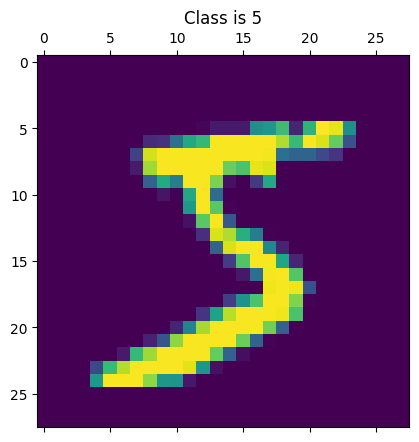

In [9]:
#visualization
import matplotlib.pyplot as plt
plt.matshow(X_train[0])
plt.title(f"Class is {y_train[0]}")
plt.show()

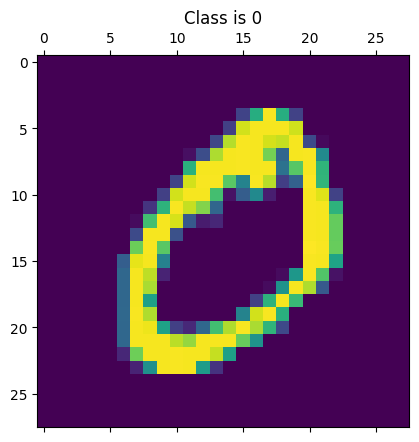

In [10]:
#visualization
import matplotlib.pyplot as plt
plt.matshow(X_train[1])
plt.title(f"Class is {y_train[1]}")
plt.show()

In [11]:
# preprocessing
# 0 to 255
import numpy as np

In [12]:
np.max(X_train) , np.min(X_train)

(np.uint8(255), np.uint8(0))

In [13]:
X_train = X_train/255
X_test = X_test/255

In [14]:
np.max(X_train) , np.min(X_train)

(np.float64(1.0), np.float64(0.0))

In [15]:
np.max(X_test) , np.min(X_test)

(np.float64(1.0), np.float64(0.0))

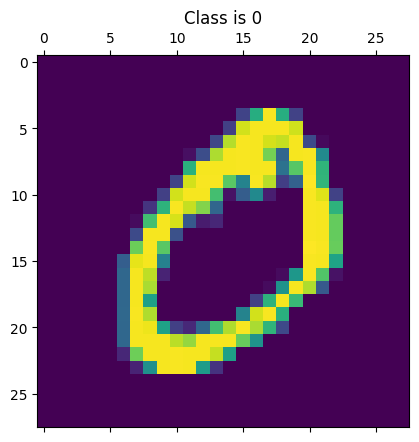

In [16]:
#visualization
import matplotlib.pyplot as plt
plt.matshow(X_train[1])
plt.title(f"Class is {y_train[1]}")
plt.show()

In [17]:
28*28

784

In [18]:
#flattening -> convert multi dim into 1 dim
X_train = X_train.reshape(60000,784)
X_test = X_test.reshape(10000,784)

In [19]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [20]:
# target values - one hot encoding
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

In [21]:
y_train[:5]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

In [22]:
model = Sequential()

In [23]:
model.add(Dense(256,activation='relu',input_shape=(784,) , name = "h1"))
model.add(Dense(128,activation='relu', name = "h2"))
model.add(Dense(10,activation='softmax', name = "o"))
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ h1 (Dense)                      │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ h2 (Dense)                      │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ o (Dense)                       │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 235,146 (918.54 KB)

 Trainable params: 235,146 (918.54 KB)

 Non-trainable params: 0 (0.00 B)

In [24]:
model.layers[0].get_weights() #return both weights and bias

[array([[ 0.05077395, -0.0101987 ,  0.03354032, ..., -0.02674077,
          0.07475214,  0.0627142 ],
        [-0.00935865, -0.02351004,  0.050899  , ..., -0.05089727,
          0.04346629,  0.07508239],
        [-0.04080109, -0.06903986,  0.07241288, ...,  0.04468651,
          0.05312186, -0.07430907],
        ...,
        [-0.0291831 , -0.01046479,  0.06329904, ..., -0.0580949 ,
         -0.03842611, -0.01812185],
        [-0.04544128, -0.02161645, -0.00266017, ..., -0.04186774,
          0.06840451,  0.03052096],
        [-0.03755549, -0.04627778,  0.01681022, ..., -0.00214552,
          0.00756406, -0.02527529]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

In [25]:
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [26]:
history = model.fit(x = X_train , y = y_train,
                    epochs = 25,
                    batch_size=32,
                    validation_data = (X_test,y_test))

Epoch 1/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.8963 - loss: 0.3465 - val_accuracy: 0.9704 - val_loss: 0.1018
Epoch 2/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9722 - loss: 0.0935 - val_accuracy: 0.9758 - val_loss: 0.0812
Epoch 3/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9808 - loss: 0.0646 - val_accuracy: 0.9785 - val_loss: 0.0786
Epoch 4/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9856 - loss: 0.0475 - val_accuracy: 0.9769 - val_loss: 0.0950
Epoch 5/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9881 - loss: 0.0398 - val_accuracy: 0.9798 - val_loss: 0.0808
Epoch 6/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9911 - loss: 0.0312 - val_accuracy: 0.9810 - val_loss: 0.0740
Epoch 7/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.9928 - loss: 0.0258 - val_accuracy: 0.9801 - val_loss: 0.0889
Epoch 8/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9935 - loss: 0

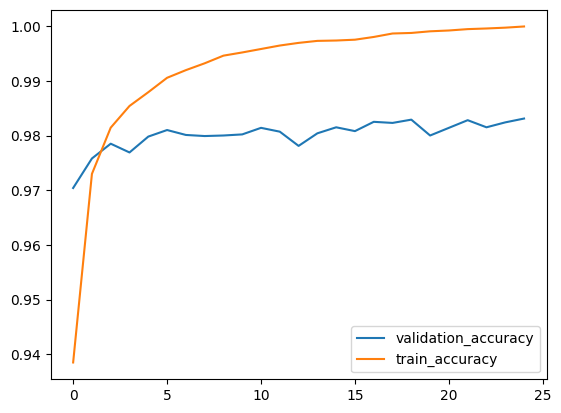

In [27]:
h = history.history
plt.plot(h['val_accuracy'] , label='validation_accuracy')
plt.plot(h['accuracy'] , label='train_accuracy')
plt.legend()
plt.show()

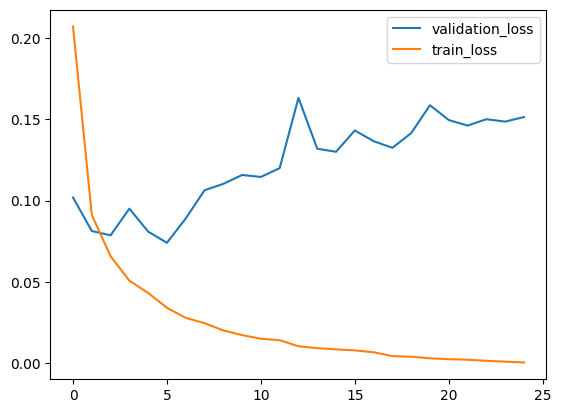

In [28]:
plt.plot(h['val_loss'] , label='validation_loss')
plt.plot(h['loss'] , label='train_loss')
plt.legend()
plt.show()

In [29]:
model.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9785 - loss: 0.1981


[0.15135706961154938, 0.9830999970436096]